In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC_5_1.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
### Open-loop: 3 m/s v， 35 degrees roll

Ts = 0.05
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
H = 7 # MPC horizon in seconds
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0])  # initial state

x_target = np.array([0, 0, 0, 0, 0, 35 * np.pi / 180, 3, 3, 3, 0, 0, 2.0])
# x_target = np.array([0, 0, 0, 0, 0, 0, -10, 0, 0, 0, 0, 2.0])

mpc = MPCVelControl().new_controller(rocket, Ts, H)
t0 = 0
u, x_ol, u_ol, t_ol, = mpc.get_u(t0, x0, x_target=x_target)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 31 iterations.
Maximum invariant set successfully computed after 31 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 44 iterations.


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=139, step=2), IntSlider(value=0…

In [4]:
Ts = 0.05
sim_time = 15; 
H = 7.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 

Maximum invariant set successfully computed after 31 iterations.
Maximum invariant set successfully computed after 31 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 44 iterations.
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.75: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.80: 
 State beta violation: -0.17 < -0.17, 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
 State alpha violation: 0.17 > 0.17, 
Simulating time 1.00: 
 State beta violation: -0.1

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

[4.39030306e-10]
[16.66666666]


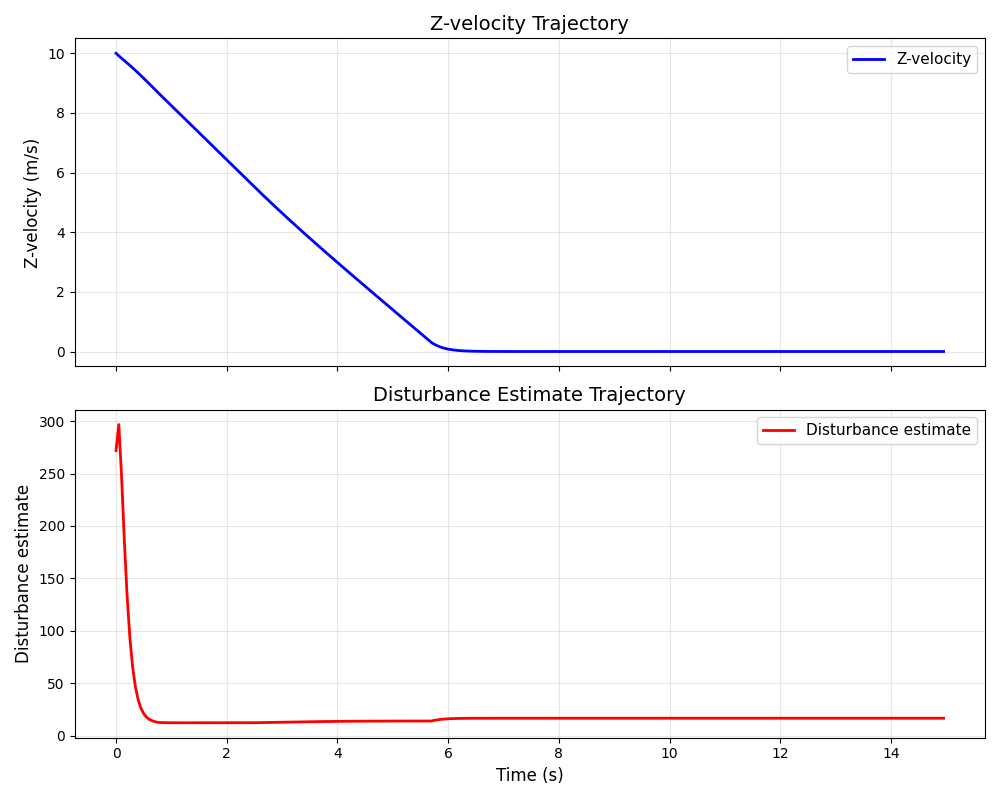

In [5]:
import matplotlib.pyplot as plt

# Create time array matching the trajectory length
t_vel_z = t_cl[:-1]  # Time points for trajectories

# Convert trajectory lists to numpy arrays
vel_z_array = np.array(mpc.vel_z_traj).flatten()
d_estimate_array = np.array(mpc.d_estimate_traj).flatten()
print(mpc.vel_z_traj[-1])
print(mpc.d_estimate_traj[-1])
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot z-velocity
ax1.plot(t_vel_z, vel_z_array, 'b-', linewidth=2, label='Z-velocity')
ax1.set_ylabel('Z-velocity (m/s)', fontsize=12)
ax1.set_title('Z-velocity Trajectory', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)

# Plot disturbance estimate
ax2.plot(t_vel_z, d_estimate_array, 'r-', linewidth=2, label='Disturbance estimate')
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Disturbance estimate', fontsize=12)
ax2.set_title('Disturbance Estimate Trajectory', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

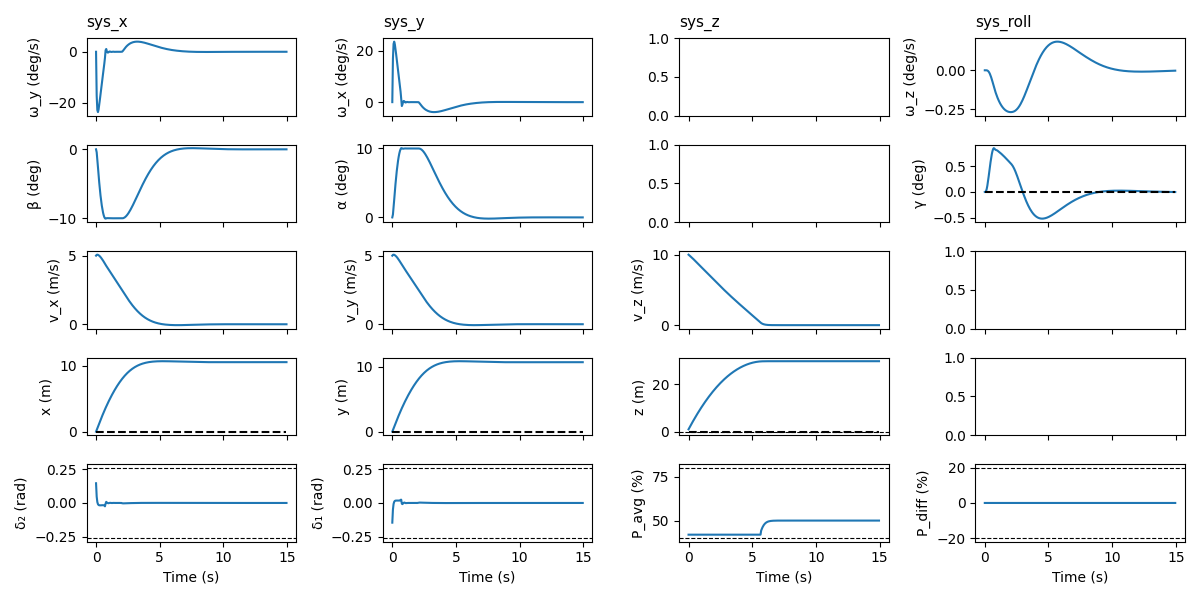

In [6]:
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs
target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, target)